# Prompt Engineering for Diversity in Generated Humans

### By Kincannon Wilson

The following notebook file walks through the results from my 
project for CS 839. Each section is separated with MarkDown cells.

## Imports & Helper Functions

In [3]:
import csv
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from data import AGE_DICT_GLOBAL, AGE_DICT_UNIFORM, AGE_DICT_US, \
    SEX_DICT_GLOBAL, SEX_DICT_UNIFORM, SEX_DICT_US, \
    RACE_DICT_US, RACE_DICT_GLOBAL, RACE_DICT_UNIFORM 

CHOSEN_AGE_DICT = AGE_DICT_GLOBAL
CHOSEN_SEX_DICT = SEX_DICT_UNIFORM
CHOSEN_RACE_DICT = RACE_DICT_GLOBAL

In [4]:
def process_csv(filename):
    with open(filename, encoding='utf-8') as f:
        return list(csv.reader(f))

In [5]:
def check_NA_count(rows):
    num_NA_results = len([row for row in rows if \
        row[2] == "NA" or row[3] == "NA" or row[4] == "NA"])
    total_results = len(rows)
    NA_results_per = round(100 * (100 * num_NA_results / total_results)) / 100
    print(f"{num_NA_results} out of {total_results} total results were NA. That's {NA_results_per}%.")

In [6]:
def plot_histogram(dict_in, title, x_lab, y_lab):
    dict_sorted = dict(sorted(dict_in.items()))
    plt.bar([str(i) for i in list(dict_sorted.keys())], list(dict_sorted.values()))
    plt.xticks(rotation="vertical")
    if len(dict_sorted.keys()) > 10:
        ax = plt.gca()
        ax.xaxis.set_major_locator(MaxNLocator(40))
    plt.title(title)
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    plt.figure(figsize=(15, 2))
    plt.tight_layout()
    plt.show()

In [35]:
def dicts_for_rows(rows):

    age_dict, sex_dict, race_dict = {}, {}, {}
    total_age = 0
    age_count = 0

    female_count = 0
    male_count = 0

    for row in rows:

        if row[2] == "NA" or row[3] == "NA" or row[4] == "NA":
            continue

        if int(row[2]) not in age_dict:
            age_dict[int(row[2])] = 0
            age_count += 1
            total_age += int(row[2])
        age_dict[int(row[2])] += 1

        if row[3] not in sex_dict:
            sex_dict[row[3]] = 0
        if row[3] == "male": male_count += 1
        else: female_count += 1
        sex_dict[row[3]] += 1

        if row[4] not in race_dict:
            race_dict[row[4]] = 0
        race_dict[row[4]] += 1
    print('found avg age: ', total_age / age_count)
    print('found % female: ', 100 * female_count / (female_count + male_count), \
         ' and % male: ', 100 * male_count / (female_count + male_count))
    return age_dict, sex_dict, race_dict

In [36]:
def plot_for_rows(rows, age_title, sex_title, race_title):
    """
    Takes in a rows (a list of lists resulting from 
    processing the csv) as well as empty dicts for
    the age, sex, and race of the results. These 
    dicts are modified in place and are used to 
    plot a histogram for each of the filled dicts.
    """
    age_dict, sex_dict, race_dict = dicts_for_rows(rows)
    plot_histogram(age_dict, age_title, 'Ages', 'Frequency')
    plot_histogram(sex_dict, sex_title, 'Sexes', 'Frequency')
    plot_histogram(race_dict, race_title, 'Races', 'Frequency')

In [9]:
def process_manual_data(starting_col_idx, manual_rows):
    rows = []
    for row in manual_rows:
        for sample_num in [1, 2, 3, 4]:
            sample_list = [row[0], sample_num] # Ensures a format suitable for plot_for_rows
            for col_offset in range(3):
                col_idx = starting_col_idx + (sample_num-1)*3 + col_offset
                sample_list.append(row[col_idx])
            rows.append(sample_list)

    return rows

## Initial Base Data Analysis

The following cells demonstrate the results from 
applying the popular [DeepFace library](https://github.com/serengil/deepface)
on the 120 images generated by Dall-E 2 from the 
30 undiversified prompts.

In [10]:
# Process the csv data from the base results
base_csv_data = process_csv('base_results.csv')
header = base_csv_data[0] # The same header is used for each rows list of lists
base_csv_rows = base_csv_data[1:]

In [11]:
# First, let's check how many NA results we got
check_NA_count(base_csv_rows)

83 out of 120 total results were NA. That's 69.17%.


found avg age:  32.1764705882353
found % female:  18.91891891891892  and % male:  81.08108108108108


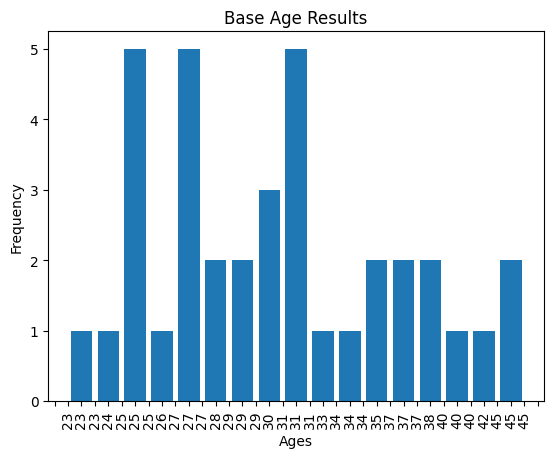

<Figure size 1500x200 with 0 Axes>

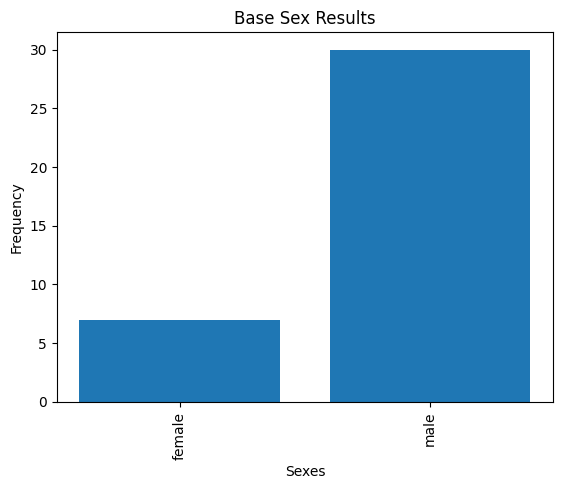

<Figure size 1500x200 with 0 Axes>

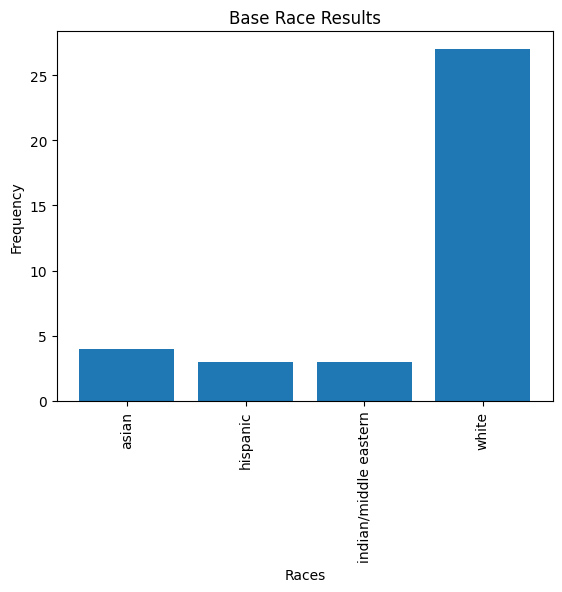

<Figure size 1500x200 with 0 Axes>

In [37]:
# Next, let's plot the histograms for the base results
plot_for_rows(base_csv_rows, 'Base Age Results', 'Base Sex Results', 'Base Race Results')

## Initial Diversified Data Analysis

The following cells demonstrate the results from 
applying the same VGG-Face model from the DeepFace library
on 120 images generated by Dall-E 2 from the 
30 diversified prompts.

In [13]:
# Process the csv data from the diversified results
diverse_csv_data = process_csv('diverse_results.csv')
diverse_csv_rows = diverse_csv_data[1:]

In [14]:
# Check how many NA results we got
check_NA_count(diverse_csv_rows)

76 out of 120 total results were NA. That's 63.33%.


found avg age:  31.72222222222222
found % female:  18.181818181818183  and % male:  81.81818181818181


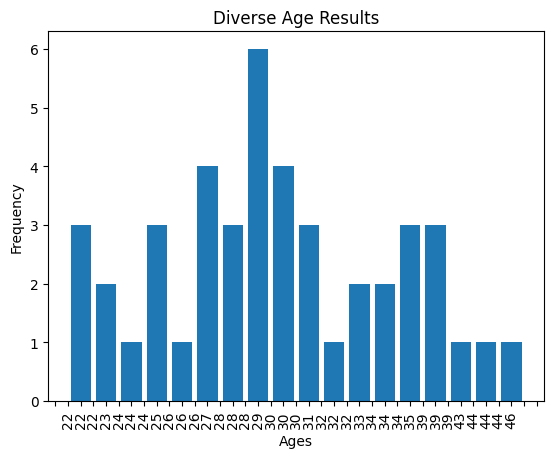

<Figure size 1500x200 with 0 Axes>

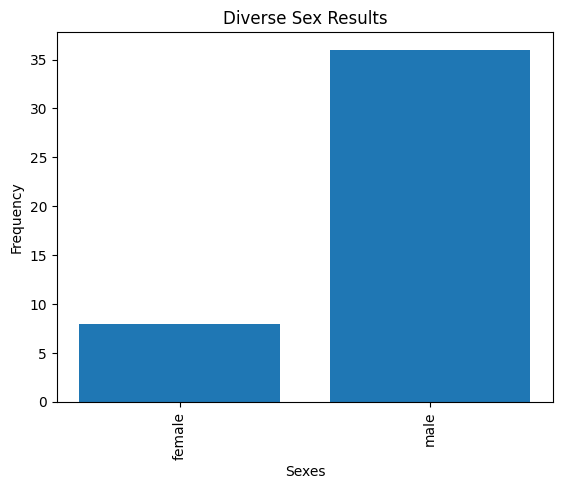

<Figure size 1500x200 with 0 Axes>

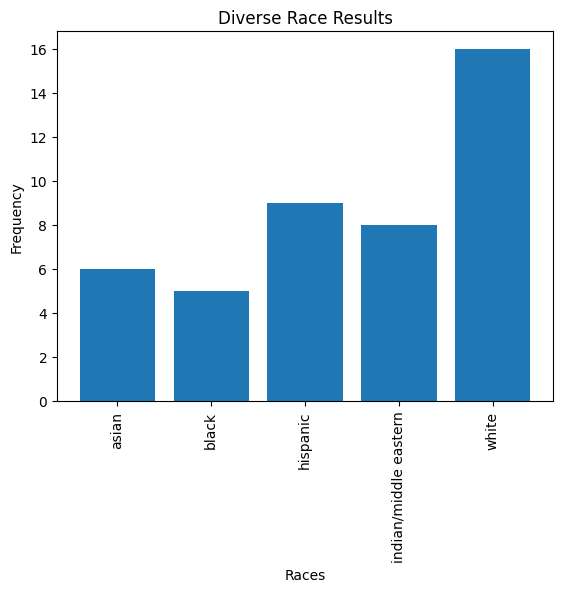

<Figure size 1500x200 with 0 Axes>

In [38]:
# Next, let's plot the histograms for the diverse results
plot_for_rows(diverse_csv_rows, 'Diverse Age Results', 'Diverse Sex Results', 'Diverse Race Results')

## Base Data Human Analysis

Since the age/sex/race of so many of the images were 
unlabled or mislabeld, I decided to assess them myself.
The following is analysis on the labels I assigned to 
each of the 120 undiversified images from Dall-E 2.

In [16]:
# Process the csv data from the manual results
# This does not have the same format as the previous csv files
manual_csv_data = process_csv('manual_results.csv')
manual_csv_rows = manual_csv_data[1:]

In [17]:
# Process the data into the same format as the original results
base_starting_col_idx = 2
manual_base_rows = process_manual_data(base_starting_col_idx, manual_csv_rows)

In [18]:
# Check how many NA results we got
check_NA_count(manual_base_rows)

20 out of 120 total results were NA. That's 16.67%.


found avg age:  39.0
found % female:  42.0  and % male:  58.0


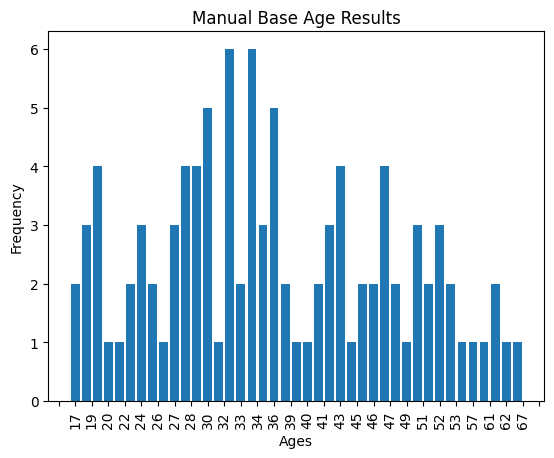

<Figure size 1500x200 with 0 Axes>

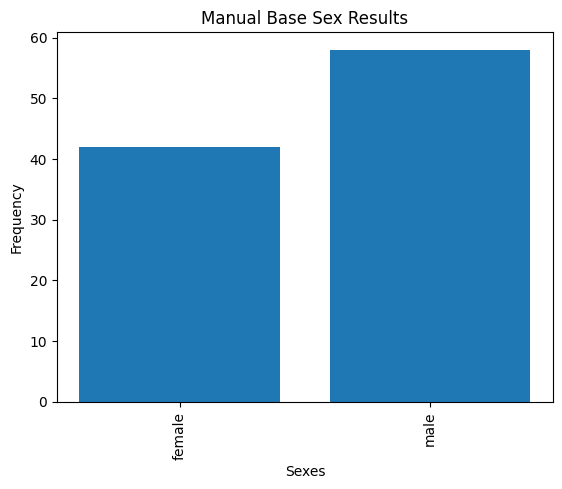

<Figure size 1500x200 with 0 Axes>

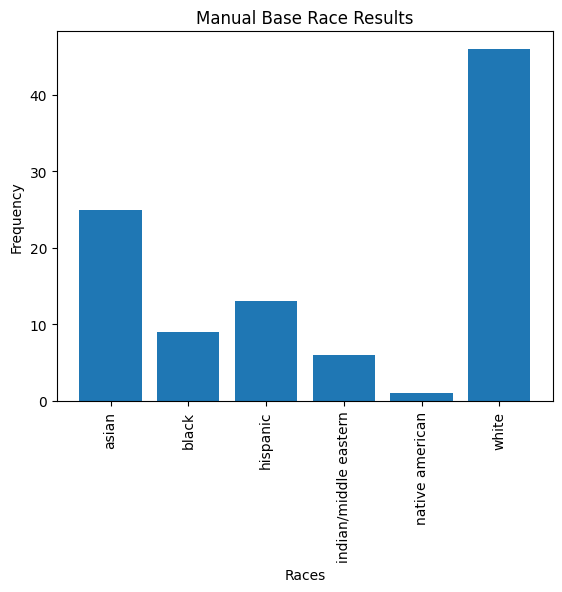

<Figure size 1500x200 with 0 Axes>

In [41]:
# Next, let's plot the histograms for the diverse results
plot_for_rows(manual_base_rows, 'Manual Base Age Results', 'Manual Base Sex Results', 'Manual Base Race Results')

## Diversified Data Human Analysis

The following is analysis on the labels I assigned to 
each of the 120 diversified images from Dall-E 2.

In [20]:
# Fformat the diversified results into a better format.
manual_div_rows = process_manual_data(15, manual_csv_rows)

In [21]:
# Check how many NA results we got
check_NA_count(manual_div_rows)

1 out of 120 total results were NA. That's 0.83%.


found avg age:  42.61538461538461
found % female:  44.53781512605042  and % male:  55.46218487394958


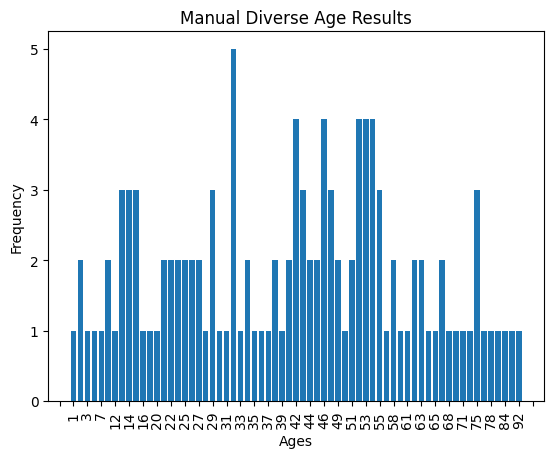

<Figure size 1500x200 with 0 Axes>

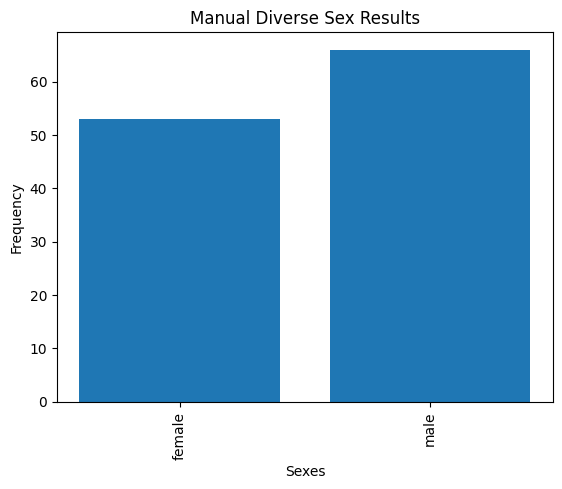

<Figure size 1500x200 with 0 Axes>

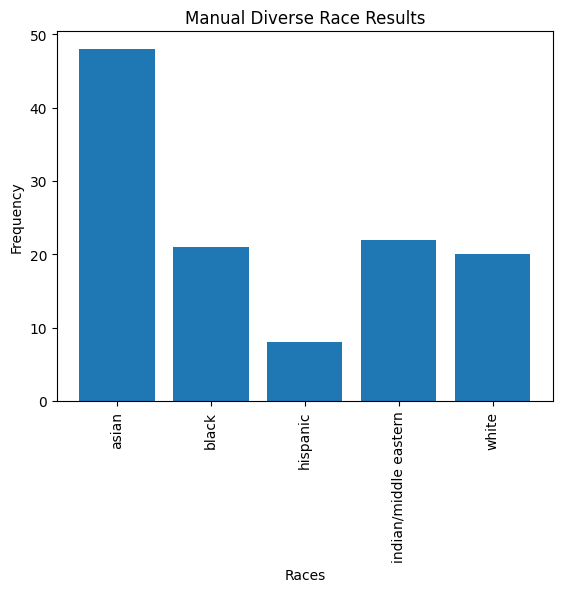

<Figure size 1500x200 with 0 Axes>

In [42]:
# Next, let's plot the histograms for the diverse results
plot_for_rows(manual_div_rows, 'Manual Diverse Age Results', 'Manual Diverse Sex Results', 'Manual Diverse Race Results')

## Diversity Score

The following cells show the calculations for the diversity 
scores of each of the 4 previously shown distributions.

In [23]:
NORM_CONST = 100

def normalize_dict(input_dict):
    input_dict_val_sum = sum(input_dict.values())
    input_dict = {k: NORM_CONST*(v/input_dict_val_sum) for k,v in input_dict.items()}
    return input_dict

In [24]:
def chi_squared_distance(in_dict, comparison_dict):

    assert len(in_dict) == len(comparison_dict) and \
        in_dict.keys() == comparison_dict.keys()

    sum = 0
    for key in in_dict:
        num = (in_dict[key] - comparison_dict[key])**2
        denom = (in_dict[key] + comparison_dict[key])
        sum += num/denom
    return sum

In [25]:
def bucketize_ages_like(age_dict, comparison_dict):
    # Create new dict like:
    # {
    #   '0-4': 9,
    #   '5-9': 12,
    #   ...
    # }
    output_dict = dict.fromkeys(comparison_dict, 0)

    for k,v in age_dict.items():
        for range_str in output_dict:
            min, max = [int(item) for item in range_str.split('-')]
            if min <= int(k) <= max:
                output_dict[range_str] += v
                break
    
    return output_dict

In [26]:
def format_races_like(race_dict, comparison_dict):

    for race in comparison_dict:
        if race not in race_dict:
            race_dict[race] = 0

    delete_keys = [race for race in race_dict if race not in comparison_dict]

    for race in delete_keys:
        del race_dict[race]

    return race_dict

In [27]:
def apply_formula(age_dist, sex_dist, race_dist):

    AGE_CONST = 1
    SEX_CONST = 3
    RACE_CONST = 1

    age_score = age_dist * AGE_CONST
    sex_score = sex_dist * SEX_CONST
    race_score = race_dist * RACE_CONST
    div_score = age_score + sex_score + race_score

    return age_score, sex_score, race_score, div_score

In [28]:
def plot_scores_histogram(x_data, y_data, title, x_lab, y_lab):
    plt.bar(x_data, y_data)
    plt.title(title)
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    plt.ylim(0, 75)
    plt.show()

In [39]:
def diversity_scores(rows, title):
    age_dict, sex_dict, race_dict = dicts_for_rows(rows)
    
    # Normalize first, then
    age_dict = normalize_dict(age_dict)
    age_dict = bucketize_ages_like(age_dict, CHOSEN_AGE_DICT)
    sex_dict = normalize_dict(sex_dict)
    race_dict = normalize_dict(race_dict)
    race_dict = format_races_like(race_dict, CHOSEN_RACE_DICT)

    age_comparison_dict = normalize_dict(CHOSEN_AGE_DICT)
    sex_comparison_dict = normalize_dict(CHOSEN_SEX_DICT)
    race_comparison_dict = normalize_dict(CHOSEN_RACE_DICT)

    # Find the chi-squared distance
    age_dist = chi_squared_distance(age_dict, age_comparison_dict)
    sex_dist = chi_squared_distance(sex_dict, sex_comparison_dict)
    race_dist = chi_squared_distance(race_dict, race_comparison_dict)

    print('found age_dist: ', age_dist)
    print('found sex_dist: ', sex_dist)
    print('found race_dist: ', race_dist)

    age_score, sex_score, race_score, div_score = apply_formula(age_dist, sex_dist, race_dist)
    
    print('Diversity score: ', div_score)

    plot_scores_histogram(['Age', 'Sex', 'Race'], [age_score, sex_score, race_score], \
        title, 'Categories', 'Score')


found avg age:  32.1764705882353
found % female:  18.91891891891892  and % male:  81.08108108108108
found age_dist:  54.04411718069427
found sex_dist:  21.386699009500706
found race_dist:  69.7112387690853
Diversity score:  187.91545297828168


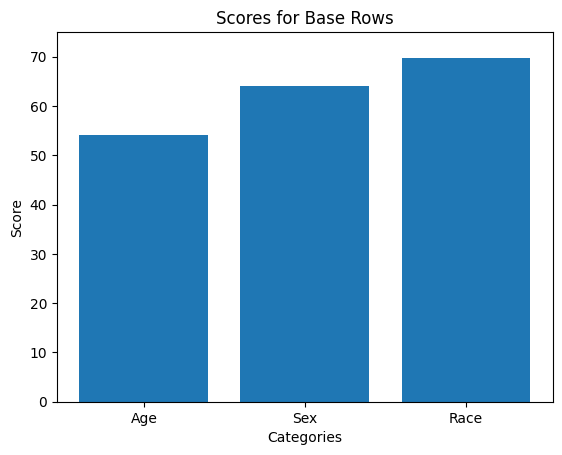

found avg age:  31.72222222222222
found % female:  18.181818181818183  and % male:  81.81818181818181
found age_dist:  45.214153876102834
found sex_dist:  22.52873563218391
found race_dist:  21.371204896536145
Diversity score:  134.1715656691907


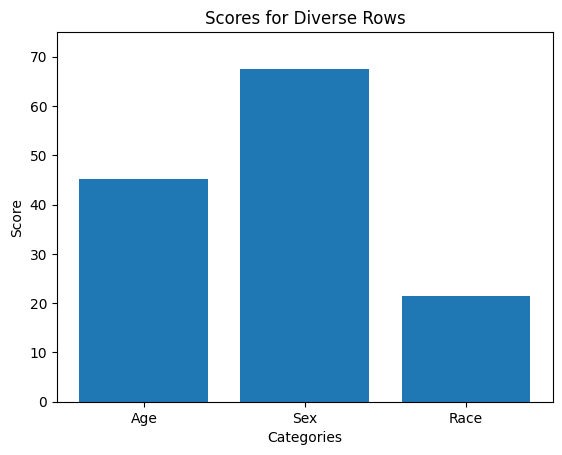

found avg age:  39.0
found % female:  42.0  and % male:  58.0
found age_dist:  40.95536738926254
found sex_dist:  1.2882447665056351
found race_dist:  27.367996922111562
Diversity score:  72.188098610891


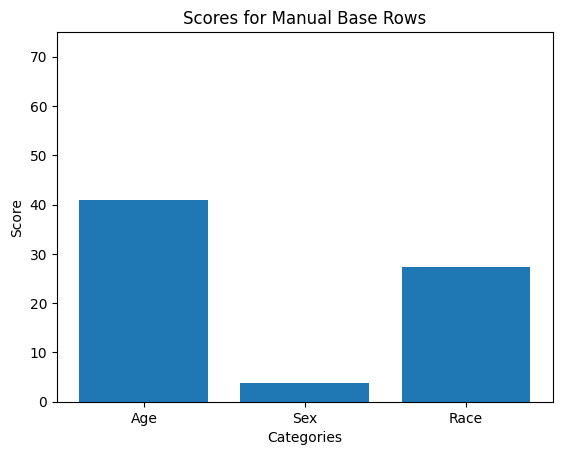

found avg age:  42.61538461538461
found % female:  44.53781512605042  and % male:  55.46218487394958
found age_dist:  7.84129556814239
found sex_dist:  0.598494909251881
found race_dist:  6.739490497761116
Diversity score:  16.37627079365915


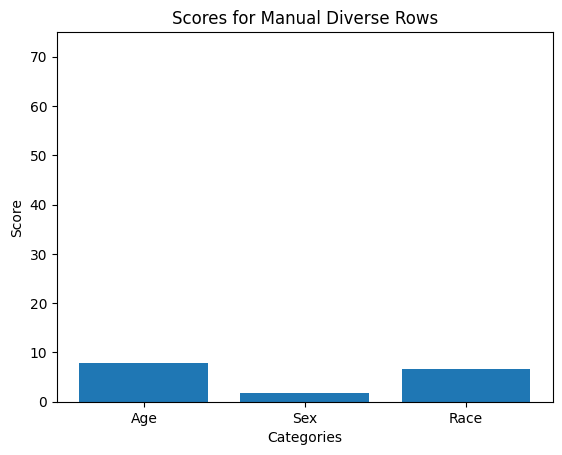

In [43]:
diversity_scores(base_csv_rows, 'Scores for Base Rows')
diversity_scores(diverse_csv_rows, 'Scores for Diverse Rows')
diversity_scores(manual_base_rows, 'Scores for Manual Base Rows')
diversity_scores(manual_div_rows, 'Scores for Manual Diverse Rows')